# Decision tree

Decision tree classifiers are attractive models if we care about interpretability. Let's consider the following example in which we use a decision tree to decide upon an activity on a particular day:


<img src="images/decision_tree_example.jpeg" alt="Decision Tree Example" Title="Decision Tree Example" height="600" width="400">

Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. 

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **Information Gain (IG)**. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximal depth of the tree.

## Maximizing information gain

In this technique, the objective function is to maximize the information gain at each split, which we define as follows:

\begin{equation*}
IG \left( D_p, f \right) = I \left( D_p \right) - \sum_{j=1}^m \frac{N_j}{N_p} I \left( D_j \right)
\end{equation*}

Here, $f$ is the feature to perform the split, $D_p$ and $D_j$ are the dataset of the parent and jth child node, $I$ is our **impurity** measure, $N_p$ is the total number of samples at the parent node, and $N_j$ is the number of samples in the jth child node. As we can see, the information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities — the lower the impurity of the child nodes, the larger the information gain. However, for simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees. This means that each parent node is split into two child nodes, $D_{left}$ and $D_{right}$:

\begin{equation*}
IG \left( D_p, f \right) = I \left( D_p \right) - \frac{N_{left}}{N_p} I \left( D_{left} \right) - \frac{N_{right}}{N_p} I \left( D_{right} \right)
\end{equation*}

The three impurity measures or splitting criteria that are commonly used in binary decision trees are **Gini impurity** ($I_G$), **entropy** ($I_H$), and the **classification error** ($i_E$). Let us start with the definition of entropy for all non-empty classes ($p \left(i | t \right) \neq 0$):

\begin{equation*}
I_H \left( t \right) = - \sum_{i=1}^c p \left( i | t \right) log_2 p \left( i | t \right)
\end{equation*}

Here, $p \left( i | t \right)$ s the proportion of the samples that belong to class $c$ for a particular node $t$. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. For example, in a binary class setting, the entropy is 0 if $p(i=1|t)=1$ or $p(i=0|t)=0$ If the classes are distributed uniformly with $p(i=1|t)=0.5$ and $p(i=0|t)=0.5$, the entropy is 1. Therefore, we can say that the entropy criterion attempts to maximize the mutual information in the tree.

Intuitively, the Gini impurity can be understood as a criterion to minimize the probability of misclassification:

\begin{equation*}
I_G \left( t \right) = \sum_{i=1}^c p \left( i | t \right) \left( 1 - p \left( i | t \right) \right) = 1 - \sum_{i=1}^c p \left( i | t \right)^2
\end{equation*}

Similar to entropy, the Gini impurity is maximal if the classes are perfectly mixed, for example, in a binary class setting ($c=2$):

\begin{equation*}
I_G \left( t \right) = 1 - \sum_{i=1}^c 0.5^2 = 0.5
\end{equation*}

Another impurity measure is the classification error:

\begin{equation*}
I_E = 1 - \max \left\{ p \left( i | t \right) \right\}
\end{equation*}

This is a useful criterion for pruning but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes. We can illustrate this by looking at the two possible splitting scenarios shown in the following figure:

<img src="images/splitting_scenarios.jpeg" alt="Decision Tree Example" Title="Decision Tree Example" height="600" width="400">

We start with a dataset $D_p$ at the parent node $D_p$, which consist 40 samples from class 1 and 40 samples from class 2 that we split into two datasets, $D_{left}$ and $D_{right}$. The information gain using the classification error as a splitting criterion would be the same $\left( IG_E = 0.25 \right)$ in both scenarios, A and B:

\begin{equation*}
\begin{matrix}
I_E \left( D_p \right) = 0 - 0.5 = 0.5 \\
A: I_E \left( D_{left} \right) = 1 - \frac{3}{4} = 0.25 \\
A: I_E \left( D_{right} \right) = 1 - \frac{3}{4} = 0.25 \\
A: IG_E = 0.25 - \frac{4}{8} 0.25 - \frac{4}{8} 0.25 = 0.25 \\
B: I_E \left( D_{left} \right) = 1 - \frac{4}{6} = \frac{1}{3} \\
B: I_E \left( D_{right} \right) = 1 - 1 = 0
B: IG_E = 0.5 - \frac{6}{8} \times \frac{1}{3} - 0 = 0.25
\end{matrix}
\end{equation*}

However, the Gini impurity would favor the split in scenario B ($IG_G = 1\bar{6} $) over scenario A (IG_G = 0.125), which is indeed more pure:

\begin{equation*}
\begin{matrix}
I_G \left( D_p \right) = 1 - \left(0.5^2 + 0.5^2 \right) = 0.5 \\
A: I_G \left(D_{left} \right) = 1 - \left( \left( \frac{3}{4} \right)^2 + \left( \frac{1}{4} \right)^2 \right) = \frac{3}{8} = 0.375 \\
A: I_G \left( D_{right} \right) = 1 - \left( \left( \frac{1}{4} \right)^2 + \left( \frac{3}{4} \right)^2 \right) = \frac{3}{8} = 0.375 \\
A: IG_G = 0.5 - \frac{4}{8} 0.375 - \frac{4}{8} 0.375 = 0.125 \\
B: I_G \left( D_{left} \right) = 1 - - \left( \left( \frac{2}{6} \right)^2 + \left( \frac{4}{6} \right)^2 \right) = \frac{4}{9} = 0. \bar{4} \\
B: I_G \left(D_{right} \right) = | - \left( 1^2 + 0^2 \right) = 0 \\
B: IG_G = 0.5 - \frac{6}{8} 0.\bar{4} - 0 = 0.1\bar{\bar{6}}
\end{matrix}
\end{equation*}

Similarly, the entropy criterion would also favor scenario B ($IG_H = 0.31$) over scenario A ($IG_H = 0.19$):

\begin{equation*}
\begin{matrix}
I_H \left( D_p \right) = - \left( 0.5 \log_2 \left(0.5 \right) + 0.5 \log_2 \left( 0.5 \right) \right) = 1 \\
A: I_H \left( D_{left} \right) = - \left( \frac{3}{4} \log_2 \left( \frac{3}{4} \right) + \frac{1}{4} \log_2 \left( \frac{1}{4} \right) \right) = 0.81 \\
A: IG_H = 1 - \frac{4}{8} 0.81 - \frac{4}{8} 0.81 = 0.19 \\
B: I_H \left( D_{left} \right) = - \left( \frac{2}{6} \log_2 \left( \frac{2}{6} \right) + \frac{4}{6} \log_2 \left( \frac{4}{6} \right) \right) = 0.92 \\
B: I_H \left( D_{right} \right) = 0 \\
B: IG_H = 1 - \frac{6}{8} 0.92 - 0 = 0.31
\end{matrix}
\end{equation*}

For a more visual comparison of the three different impurity criteria that we discussed previously, let us plot the impurity indices for the probability range $[0, 1]$ for class 1. Note that we will also add a scaled version of the entropy (entropy / 2) to observe that the Gini impurity is an intermediate measure between entropy and the classification error.

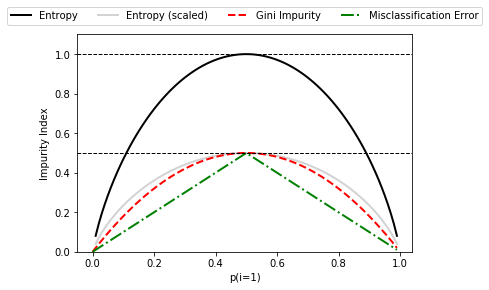

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return (p) * (1 - (p)) + (1 - p)*(1 - (1-p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])


x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity',
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()


## Building a decision tree

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting.

In [1]:
#prepare data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

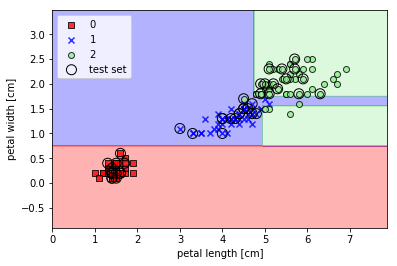

In [9]:
from sklearn.tree import DecisionTreeClassifier
from plot_regions import plot_decision_regions

tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
# save usign pydotplus (and graphviz, pyparsing)
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Verginica'], feature_names=['petal lenght', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree5.png')

True

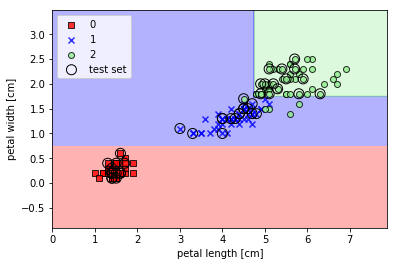

In [5]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Verginica'], feature_names=['petal lenght', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_d3.png')

True

Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree determined from our training dataset.

Looking at this tree, and the decision region plot of the tree, we see that the decision tree does a very good job of separating the flower classes. Unfortunately, scikit-learn currently does not implement functionality to manually post-prune a decision tree. However, we could go back to our previous code example, change the max_depth of our decision tree to 3, and compare it to our current model.

# Random Forest

Intuitively, a random forest can be considered as an ensemble of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance, to build a more robust model that has a better generalization performance and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:

1. Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
  1. Randomly select d features without replacement.
  2. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain.
3. Repeat the steps 1-2 k times.
4. Aggregate the prediction by each tree to assign the class label by majority vote.

We should note one slight modification in step 2 when we are training the individual decision trees: instead of evaluating all features to determine the best split at each node, we only consider a random subset of those.

A big advantage of random forests is that we don't have to worry so much about choosing good hyperparameter values. We typically don't need to prune the random forest since the ensemble model is quite robust to noise from the individual decision trees. The only parameter that we really need to care about in practice is the number of trees k (step 3) that we choose for the random forest. Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

In most implementations, the size of the bootstrap sample is chosen to be equal to the number of samples in the original training set, which usually provides a good bias-variance tradeoff. For the number of features d at each split, we want to choose a value that is smaller than the total number of features in the training set. A reasonable default that is used in scikit-learn and other implementations is $d= \sqrt{m}$ where m is the number of features in the training set.

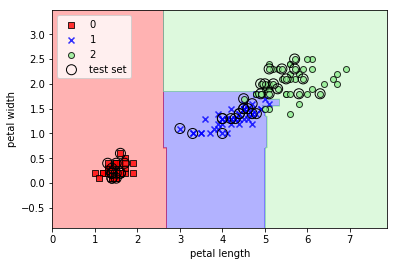

In [8]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()